In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
def linear_regression(x_train,y_train):
    
    X=np.c_[[1]*len(x_train),x_train]
    XT=np.transpose(X)
    XT_X=np.matmul(XT,X)
    XT_X_inv=np.linalg.inv(XT_X)
    XT_y=np.matmul(XT,y_train)
    weight_vector=np.matmul(XT_X_inv,XT_y)
    print("w*=\n",weight_vector)
    return weight_vector

In [3]:
x, y = make_regression(n_samples=100, n_features=1, bias = 0, noise =5,random_state=40)
# Scale feature x to range -5…..5
x = np.interp(x, (x.min(), x.max()), (-5, 5))
# Scale target y to range 15…..-15
y = np.interp(y, (y.min(), y.max()), (15, -15))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [4]:
weight_vector=linear_regression(x_train,y_train)

w*=
 [ 0.00683045 -3.04320116]


In [5]:
y_te_predicted=np.dot(x_test,weight_vector[1])+weight_vector[0]
print("predicted on testing data set=\n",np.transpose(y_te_predicted))
result=mean_squared_error(y_true=y_test,y_pred=y_te_predicted)
print("\nRoot Mean Squared Error on testing data set: ", result)
# print(np.shape(y_test),np.shape(y_predicted))

y_tr_predicted=np.dot(x_train,weight_vector[1])+weight_vector[0]
print("predicted on training data set=\n",np.transpose(y_tr_predicted))
result=mean_squared_error(y_true=y_train,y_pred=y_tr_predicted)
print("\nRoot Mean Squared Error on training data set: ", result)

y_predicted=np.dot(x,weight_vector[1])+weight_vector[0]

predicted on testing data set=
 [[ -5.81976665  -9.78002773 -11.65212727  -9.79109352  -1.900967
   -6.93132581 -10.00585066   4.79304393   6.654241     5.77579127
   -1.18127473  -1.60226996  -5.18450156  -5.8519708   -9.21010468
    1.84973029  -5.2437885   10.23414219 -11.83878371 -10.84561679]]

Root Mean Squared Error on testing data set:  0.15457129483497362
predicted on training data set=
 [[ -1.88705838  -7.91463262   9.14674524  -2.16403838   3.25338162
    1.92082944   0.85349035  -3.29295643  -2.17599648   6.14079351
  -14.74010006  -4.85269487   8.94363653 -15.20917532  -2.52485581
   -5.3220527    4.25839126   8.23283581   0.83475682  -2.36492888
   -2.73903613   8.29193396  -0.68458471   1.53166914   2.30301277
   -1.2271147   -0.98207727   1.51077546   1.32757745  -6.6437078
   -0.67872247   0.82551069   9.12527772  -1.77692845  -3.24141045
   -2.95446433   1.2501596   -6.3487265    1.26413089   5.26839248
   -7.4381226   -9.32407522  -4.6266347    0.10757546  -1.3036415

In [6]:
#using inbuilt function LinearRegression from sklearn
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x_train,y_train)
# Make predictions using the testing set
y_pred_inbuilt=regr.predict(x_test)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_inbuilt))

Coefficients: 
 [-3.04320116]
Mean squared error: 0.15


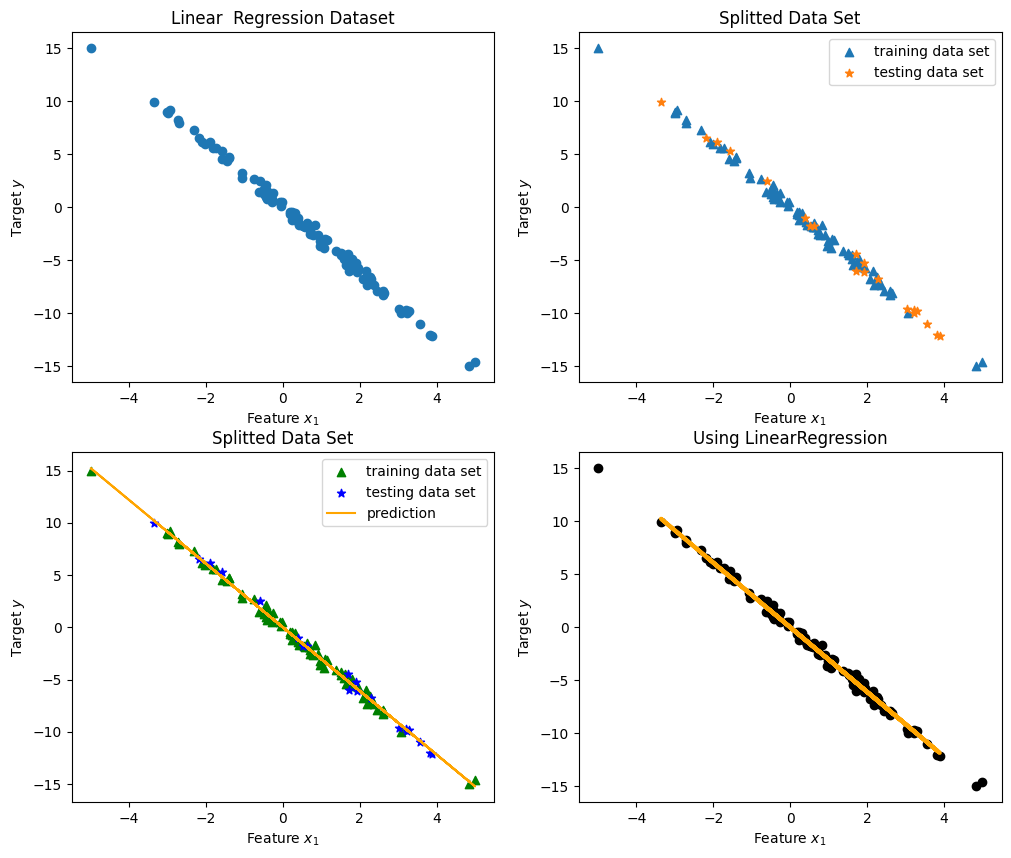

In [7]:
# Plot 1: Overall Data Set
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12, 10))
ax[0,0].scatter(x,y,label='Overall dataset')
ax[0,0].set_title('Linear  Regression Dataset')
ax[0,0].set_xlabel(r'Feature $x_1$')
ax[0,0].set_ylabel(r'Target $y$')
ax[0,0].legend

# Plot 2: Training and Testing
ax[0, 1].scatter(x_train, y_train, marker='^', label="training data set") 
ax[0, 1].scatter(x_test, y_test, marker='*', label="testing data set")
ax[0, 1].set_title("Splitted Data Set")
ax[0, 1].set_xlabel(r'Feature $x_1$')
ax[0, 1].set_ylabel(r'Target $y$')
ax[0, 1].legend()

# Plot 3: Training and Testing with regression line
ax[1, 0].scatter(x_train, y_train, marker='^', color='green' ,label="training data set") 
ax[1, 0].scatter(x_test, y_test, marker='*', color='blue',label="testing data set")
ax[1, 0].plot(x, y_predicted,'-', color='orange', label='prediction')
ax[1, 0].set_title("Splitted Data Set")
ax[1, 0].set_xlabel(r'Feature $x_1$')
ax[1, 0].set_ylabel(r'Target $y$')
ax[1, 0].legend()

#plot4:inbuilt function
ax[1,1].scatter(x,y,color='black')
ax[1,1].plot(x_test,y_pred_inbuilt,color='orange',linewidth=3)
ax[1,1].set_xlabel(r'Feature $x_1$')
ax[1,1].set_ylabel(r'Target $y$')
ax[1,1].set_title("Using LinearRegression")
# ax[1,1].legend()

plt.show()